# Mapping Interconnections: Conspiracies Behind Wildfire Causes in Portugal (part 1 - Data acquisition)

Data Mining project by:
- 104342 | Bernardo Ye
- 104204 | Alexander Simões


## 1 - Introduction



For our group project, we will explore the possible relationships surrounding the causes of wildfires in Portugal.

The project was inspired by news following Prime Minister Luís Montenegro’s suggestion of hidden 'interests.' Speculation has linked industries such as paper, lithium mining, and private firefighting companies to the fires. Our focus will be on using data mining to map the interconnections behind these conspiracy theories and their spread.

Source: https://rr.sapo.pt/fotoreportagem/pais/2024/09/23/por-detras-dos-interesses-nos-incendios-sobram-teorias-da-conspiracao/394494/

## 2 - Project Objectives



This project aims to map and analyze the interconnections between different topics present in news articles about wildfires in Portugal. Specifically, we will investigate the correlation between the occurrence of wildfires and other factors, such as mining activities and the paper industry. The objectives are as follows:

1. To collect news articles that mention wildfires from Arquivo.pt.
2. To identify interconnections between wildfires, mining activities, and the paper industry within these articles.
3. To analyze potential correlations and trends between these topics over time.
4. To provide insights into whether industries like mining and paper benefit or are impacted by wildfires.

The ultimate goal is to explore the existence of conspiracies or patterns that link these sectors to wildfire events.

## 3 - State of the Art



There have been various studies analyzing the relationships between wildfires and different industries or environmental factors. For instance, there's the 2024 arquivo.pt 1st place winner project titled "Noticioso – Challenging Perceptions," focused on building a platform that allows users to compare media coverage of various topics and track trends over time. This project showcased how archived online data could be leveraged for analyzing public discourse and media narratives, particularly using archived Portuguese web content dating back to 1996.

Source: https://noticioso.pt/

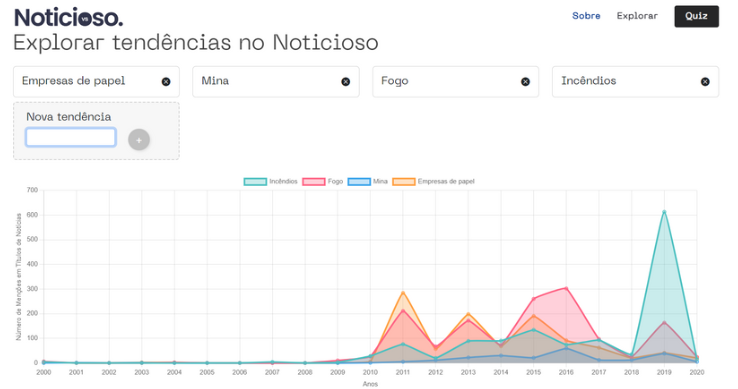


In our opinion, the winning project has a solid foundation at a macro level, but our project will take it a step further by delving deeper into the wildfire theme. The analytical tools used in 'Noticioso' to explore trends and compare media coverage can also be applied to environmental and industrial topics, such as wildfires and their connections to the paper and mining industries. By using data from Arquivo.pt, similarly to how 'Noticioso' analyzed media coverage, our project will examine how public attention and policy responses to wildfires, mining activities, and paper production have evolved over time.



## 4 - Data Acquisition



The data for this project will be sourced from the Arquivo.pt platform, which archives web content, including news articles. The methodology for data acquisition includes:

1. **Query Definition:**
   - First, we will define queries to search for news articles mentioning wildfires. The queries will include keywords such as 'incêndios' and 'fogos florestais'.
   - And then we'll focus on mining activities (e.g., 'mineração', 'extração mineral') and the paper industry (e.g., 'indústria de papel', 'celulose').

2. **Data Organization:**
   - After querying, the relevant articles will be saved in a structured format (e.g., CSV or JSON) for easier analysis. Each record will contain:
     - Title of the article
     - Date of publication
     - Keywords identified (wildfires, mining, paper industry)
     - Article content (if possible)
     - URL and source information

3. **Challenges:**
   - Due to the nature of archived data, some articles may be incomplete or difficult to retrieve. Data cleaning processes will be applied to address these issues.
   
4. **Methodology for Saving Data:**
   - The collected data will be saved locally in a CSV format for easy manipulation in Python. We'll use libraries such as `requests` and `beautifulsoup` for scraping data, and `pandas` for organizing it.


## 5 - Code Implementation

1. Importação de bibliotecas

In [54]:
import pandas as pd
import requests
import time

2. Função para obter resultados por ano e detalhes dos artigos

Função aprimorada para buscar resultados por ano e sites, com suporte a paginação 'next page' [Improved] 

In [55]:
import requests
import pandas as pd

def resultados_por_ano(query_term, sites, max_results=1000):
    # Lista para armazenar resultados e detalhes
    resultados = []
    artigos_detalhes = []
    max_items_per_page = 500  # Fixed by Arquivo.pt API

    for i in range(2017, 2020):  # Iterar pelos anos
        data = [int(f"{i}0101"), int(f"{i}1231")]

        # Loop por cada site
        for site_url in sites:
            # URL inicial da API do Arquivo.pt
            site = (f"https://arquivo.pt/textsearch?q={query_term}"
                    f"&prettyPrint=true&from={data[0]}&to={data[1]}"
                    f"&siteSearch={site_url}&maxItems={max_items_per_page}")

            total_results = 0  # Contador de resultados para cada site
            next_page_url = site  # Começa com a URL inicial
            
            while next_page_url and total_results < max_results:
                # Fazer a requisição à API
                response = requests.get(next_page_url)
                if response.status_code == 200:
                    content = response.json()

                    # Adicionar resultados do site e ano atual
                    estimated_results = content.get('estimated_nr_results', 0)
                    resultados.append({
                        "site": site_url,
                        "ano": i,
                        "termo": query_term,
                        "resultados": estimated_results
                    })

                    # Processar artigos da página atual
                    artigos_ano = content.get("response_items", [])
                    for artigo in artigos_ano:
                        if total_results < max_results:  # Limitar ao máximo definido
                            detalhes = {
                                "termo": query_term,
                                "site": site_url,
                                "ano": i,
                                "titulo": artigo.get("title", "Sem título"),
                                "data": artigo.get("date", "Sem data"),
                                "link": artigo.get("linkToNoFrame", "Sem link")
                            }
                            artigos_detalhes.append(detalhes)
                            total_results += 1

                    # Atualizar a URL para a próxima página
                    next_page_url = content.get("next_page", None)
                else:
                    print(f"Erro na requisição: {response.status_code} para {next_page_url}")
                    break

    # Criar DataFrame para artigos
    df_artigos = pd.DataFrame(artigos_detalhes)


    return resultados, df_artigos


3. Definir termos de busca e sites

In [56]:
# Lista de sites a serem pesquisados
sites = ["www.publico.pt", "www.cmjornal.pt", "www.sapo.pt", "www.expresso.pt"]

# Lista de termos de busca
query_terms = ["incêndio", "queimada", "fogo florestal", "mina", "indústria papel", "exploração de lítio", "fogo posto", "eucalipto", "pinhal", "pinhais", "limpeza florestal", "calor extremo", "vento forte", "seca"]               

# DataFrames para armazenar os resultados por site/ano e os detalhes dos artigos
df_resultados = pd.DataFrame()
df_artigos = pd.DataFrame()


4. Executar a função para cada termo de busca e site (2min)

In [57]:
# Iterar sobre cada termo de busca
for term in query_terms:
    resultados, artigos = resultados_por_ano(term, sites)
    
    # Adicionar os resultados ao DataFrame (número de artigos por site e ano) usando pd.concat()
    df_resultados = pd.concat([df_resultados, pd.DataFrame(resultados)], ignore_index=True)
    
    # Adicionar os detalhes dos artigos ao DataFrame
    df_artigos = pd.concat([df_artigos, pd.DataFrame(artigos)], ignore_index=True)
    
    print(f"\nTermo '{term}' processado\n")



Termo 'incêndio' processado


Termo 'queimada' processado


Termo 'fogo florestal' processado


Termo 'mina' processado


Termo 'indústria papel' processado


Termo 'exploração de lítio' processado


Termo 'fogo posto' processado


Termo 'eucalipto' processado


Termo 'pinhal' processado


Termo 'pinhais' processado


Termo 'limpeza florestal' processado


Termo 'calor extremo' processado


Termo 'vento forte' processado


Termo 'seca' processado



5. visualisar os resultados

In [58]:
# Exibir o número de resultados por site, ano e termo de busca
print("Resultados por site e ano:")
display(df_resultados)

# Exibir os detalhes dos artigos
print("\nDetalhes dos artigos:")
display(df_artigos)


Resultados por site e ano:


,site,ano,termo,resultados
0,www.publico.pt,2017,incêndio,67144
1,www.cmjornal.pt,2017,incêndio,185071
2,www.sapo.pt,2017,incêndio,976
3,www.expresso.pt,2017,incêndio,0
4,www.publico.pt,2018,incêndio,14047
...,...,...,...,...
163,www.expresso.pt,2018,seca,0
164,www.publico.pt,2019,seca,9642
165,www.cmjornal.pt,2019,seca,18621
166,www.sapo.pt,2019,seca,2429



Detalhes dos artigos:


,termo,site,ano,titulo,data,link
0,incêndio,www.publico.pt,2017,Incêndio em Gaia - PÚBLICO,1484714197,https://arquivo.pt/noFrame/replay/201701180436...
1,incêndio,www.publico.pt,2017,Incêndio em Gaia - PÚBLICO,1484806727,https://arquivo.pt/noFrame/replay/201701190618...
2,incêndio,www.publico.pt,2017,Complexo turístico Zmar recupera as infra-estr...,1484079686,https://arquivo.pt/noFrame/replay/201701102021...
3,incêndio,www.publico.pt,2017,Zambujeira do Mar - PÚBLICO,1484101612,https://arquivo.pt/noFrame/replay/201701110226...
4,incêndio,www.publico.pt,2017,Zambujeira do Mar - PÚBLICO,1484101603,https://arquivo.pt/noFrame/replay/201701110226...
...,...,...,...,...,...,...
1697,seca,www.sapo.pt,2019,"Autobiografia dos Xutos & Pontapés ""À Minha Ma...",1572459888,https://arquivo.pt/noFrame/replay/201910301824...
1698,seca,www.sapo.pt,2019,"MotoGP, pai e filho: Yvon, Mario e Miguel Du H...",1577391080,https://arquivo.pt/noFrame/replay/201912262011...
1699,seca,www.sapo.pt,2019,"MotoGP, pai e filho: Yvon, Mario e Miguel Du H...",1577211970,https://arquivo.pt/noFrame/replay/201912241826...
1700,seca,www.expresso.pt,2019,Expresso | Liberdade para pensar,1546884843,https://arquivo.pt/noFrame/replay/201901071814...


Converter data de segundos para formato data 

In [59]:
df_artigos['data'] = pd.to_datetime(df_artigos['data'], unit='s', errors='coerce')

display(df_artigos)

C:\Users\Bernardo\AppData\Local\Temp\ipykernel_12616\3992203972.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_artigos['data'] = pd.to_datetime(df_artigos['data'], unit='s', errors='coerce')


,termo,site,ano,titulo,data,link
0,incêndio,www.publico.pt,2017,Incêndio em Gaia - PÚBLICO,2017-01-18 04:36:37,https://arquivo.pt/noFrame/replay/201701180436...
1,incêndio,www.publico.pt,2017,Incêndio em Gaia - PÚBLICO,2017-01-19 06:18:47,https://arquivo.pt/noFrame/replay/201701190618...
2,incêndio,www.publico.pt,2017,Complexo turístico Zmar recupera as infra-estr...,2017-01-10 20:21:26,https://arquivo.pt/noFrame/replay/201701102021...
3,incêndio,www.publico.pt,2017,Zambujeira do Mar - PÚBLICO,2017-01-11 02:26:52,https://arquivo.pt/noFrame/replay/201701110226...
4,incêndio,www.publico.pt,2017,Zambujeira do Mar - PÚBLICO,2017-01-11 02:26:43,https://arquivo.pt/noFrame/replay/201701110226...
...,...,...,...,...,...,...
1697,seca,www.sapo.pt,2019,"Autobiografia dos Xutos & Pontapés ""À Minha Ma...",2019-10-30 18:24:48,https://arquivo.pt/noFrame/replay/201910301824...
1698,seca,www.sapo.pt,2019,"MotoGP, pai e filho: Yvon, Mario e Miguel Du H...",2019-12-26 20:11:20,https://arquivo.pt/noFrame/replay/201912262011...
1699,seca,www.sapo.pt,2019,"MotoGP, pai e filho: Yvon, Mario e Miguel Du H...",2019-12-24 18:26:10,https://arquivo.pt/noFrame/replay/201912241826...
1700,seca,www.expresso.pt,2019,Expresso | Liberdade para pensar,2019-01-07 18:14:03,https://arquivo.pt/noFrame/replay/201901071814...


Remover duplicados

In [60]:
# Extract the full original URL from the `link` column
df_artigos['link_base'] = df_artigos['link'].str.extract(r'(http://www.*)')

# Drop duplicates based on the full extracted `link_base`
df_artigos_unique = df_artigos.drop_duplicates(subset='link_base')

# Drop the auxiliary column if not needed
df_artigos_unique = df_artigos_unique.drop(columns=['link_base'])

print(df_artigos_unique)

         termo             site   ano  \
0     incêndio   www.publico.pt  2017   
2     incêndio   www.publico.pt  2017   
3     incêndio   www.publico.pt  2017   
11    incêndio   www.publico.pt  2017   
15    incêndio   www.publico.pt  2017   
...        ...              ...   ...   
1587      seca  www.cmjornal.pt  2018   
1588      seca  www.cmjornal.pt  2018   
1589      seca  www.cmjornal.pt  2018   
1590      seca  www.cmjornal.pt  2018   
1605      seca      www.sapo.pt  2018   

                                                 titulo                data  \
0                            Incêndio em Gaia - PÚBLICO 2017-01-18 04:36:37   
2     Complexo turístico Zmar recupera as infra-estr... 2017-01-10 20:21:26   
3                           Zambujeira do Mar - PÚBLICO 2017-01-11 02:26:52   
11                         Ferreira do Zêzere - PÚBLICO 2017-01-11 06:05:20   
15             Andrzej Zulawski (1940 - 2016) - PÚBLICO 2017-06-22 05:00:38   
...                              

6. Filtrar resultados

Função de Filtragem de Artigos 

In [61]:
def filtrar_artigos(df, site=None, termo=None, ano=None):
    # Inicia o DataFrame filtrado com todos os dados
    df_filtrado = df
    
    # Aplica o filtro por site, se fornecido
    if site:
        df_filtrado = df_filtrado[df_filtrado['site'] == site]
    
    # Aplica o filtro por termo, se fornecido
    if termo:
        df_filtrado = df_filtrado[df_filtrado['termo'] == termo]
    
    # Aplica o filtro por ano, se fornecido
    if ano:
        df_filtrado = df_filtrado[df_filtrado['data'].dt.year == ano]
    
    return df_filtrado


In [62]:
# teste função para filtrar artigos do site "www.publico.pt" e termo "incêndios" no ano de 2018
df_publico_incendios_2018 = filtrar_artigos(df_artigos, site="www.publico.pt", termo="incêndio", ano=2018)
display(df_publico_incendios_2018)


,termo,site,ano,titulo,data,link,link_base
80,incêndio,www.publico.pt,2018,Incêndio | PÚBLICO,2018-06-17 17:52:18,https://arquivo.pt/noFrame/replay/201806171752...,NaN
81,incêndio,www.publico.pt,2018,Incêndio | PÚBLICO,2018-06-18 18:33:50,https://arquivo.pt/noFrame/replay/201806181833...,NaN
82,incêndio,www.publico.pt,2018,Incêndio de grandes dimensões atinge armazéns ...,2018-12-17 18:58:00,https://arquivo.pt/noFrame/replay/201812171858...,NaN
83,incêndio,www.publico.pt,2018,Braga | Incêndio de grandes dimensões atinge a...,2018-12-17 18:58:03,https://arquivo.pt/noFrame/replay/201812171858...,NaN
84,incêndio,www.publico.pt,2018,Incêndio em autocarro faz mais de 40 mortos no...,2018-11-18 20:13:17,https://arquivo.pt/noFrame/replay/201811182013...,NaN
85,incêndio,www.publico.pt,2018,"Miley Cyrus, Neil Young entre os que perderam ...",2018-11-13 18:48:20,https://arquivo.pt/noFrame/replay/201811131848...,NaN
86,incêndio,www.publico.pt,2018,Ambiente | Portuguesa é finalista europeia de ...,2018-06-25 17:20:48,https://arquivo.pt/noFrame/replay/201806251720...,NaN
87,incêndio,www.publico.pt,2018,Ambiente | Portuguesa é finalista europeia de ...,2018-06-26 17:13:03,https://arquivo.pt/noFrame/replay/201806261713...,NaN
88,incêndio,www.publico.pt,2018,Incêndios | Tolerância zero na falta de limpez...,2018-06-02 16:27:22,https://arquivo.pt/noFrame/replay/201806021627...,NaN
89,incêndio,www.publico.pt,2018,Incêndios | Tolerância zero na falta de limpez...,2018-06-07 17:35:39,https://arquivo.pt/noFrame/replay/201806071735...,NaN


7. Guardar os dados

In [63]:
# guardar os DataFrames como CSVs
#df_resultados.to_csv('resultados_por_site_ano.csv', index=False)

df_artigos.to_csv('detalhes_artigos_bruto.csv', index=False)

df_artigos_unique.to_csv('detalhes_artigos_liquidos.csv', index=False)

## 6 - Bibliography



- Arquivo.pt documentation: https://arquivo.pt/help/
- News article about conspirancy: https://rr.sapo.pt/fotoreportagem/pais/2024/09/23/por-detras-dos-interesses-nos-incendios-sobram-teorias-da-conspiracao/394494/
- 2024 Arquivo.pt 1st place winner: https://noticioso.pt/
- Mining and Environmental Impact Research: https://www.nationalgeographic.pt/meio-ambiente/minas-desactivadas-em-portugal-e-a-sua-radioactividade-perigos-e-alertas_1205
- Stackoverflow: https://stackoverflow.com/
- Python documentation: https://docs.python.org/3/
- Free Code Camp: https://www.freecodecamp.org